In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
csv=pd.read_csv(r"D:\PythonProgramme\SalesProduct\file3.csv")
csv.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,01-01-1995,city of london,91449,E09000001,17.0,NaN
1,02-01-1995,city of london,82203,E09000001,7.0,NaN
2,03-01-1995,city of london,79121,E09000001,14.0,NaN
3,04-01-1995,city of london,77101,E09000001,7.0,NaN
4,05-01-1995,city of london,84409,E09000001,10.0,NaN


# Check How Many null values are availaible in data...

In [51]:
csv.shape

(13549, 6)

In [52]:
x=csv.isnull().sum().sum()
x

6204

In [27]:
y=csv.shape[0]
y

13549

In [28]:
z=csv.shape[1]
z

6

In [29]:
(x/(y*z))*100

7.63155952468817

In [30]:
(csv.isnull().sum().sum()/(csv.shape[0]*csv.shape[1]))*100

7.63155952468817

# Check How Many not null values are availaible in data...

In [31]:
(csv.notnull().sum().sum()/(csv.shape[0]*csv.shape[1]))*100

92.36844047531183

In [32]:
92.36844047531183+7.63155952468817

100.0

# Droping Null Values 

In [33]:
csv.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [34]:
csv.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [35]:
csv.shape

(13549, 6)

In [47]:
csv.dropna().head()

,date,area,average_price,code,houses_sold
0,01-01-1995,city of london,91449,E09000001,17.0
1,02-01-1995,city of london,82203,E09000001,7.0
2,03-01-1995,city of london,79121,E09000001,14.0
3,04-01-1995,city of london,77101,E09000001,7.0
4,05-01-1995,city of london,84409,E09000001,10.0


In [44]:
# 2nd way
# csv=csv.drop("no_of_crimes",axis=1)

In [46]:
csv.head()
# As you can see the columns is  droped

,date,area,average_price,code,houses_sold
0,01-01-1995,city of london,91449,E09000001,17.0
1,02-01-1995,city of london,82203,E09000001,7.0
2,03-01-1995,city of london,79121,E09000001,14.0
3,04-01-1995,city of london,77101,E09000001,7.0
4,05-01-1995,city of london,84409,E09000001,10.0


# Filling Null Values...

In [53]:
# 1st way
csv.fillna(10)
# But this is not write way for filling Null Values

,date,area,average_price,code,houses_sold,no_of_crimes
0,01-01-1995,city of london,91449,E09000001,17.0,10.0
1,02-01-1995,city of london,82203,E09000001,7.0,10.0
2,03-01-1995,city of london,79121,E09000001,14.0,10.0
3,04-01-1995,city of london,77101,E09000001,7.0,10.0
4,05-01-1995,city of london,84409,E09000001,10.0,10.0
...,...,...,...,...,...,...
13544,09-01-2019,england,249942,E92000001,64605.0,10.0
13545,10-01-2019,england,249376,E92000001,68677.0,10.0
13546,11-01-2019,england,248515,E92000001,67814.0,10.0
13547,12-01-2019,england,250410,E92000001,10.0,10.0


In [55]:
# 2nd way
df=csv["no_of_crimes"].fillna(10).head()
df

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: no_of_crimes, dtype: float64

In [56]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [57]:
csv.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [58]:
csv.select_dtypes(include="float64").isnull().columns

Index(['houses_sold', 'no_of_crimes'], dtype='object')

In [59]:
# 3rd way
for i in csv.select_dtypes(include="float64").isnull().columns:
    csv[i].fillna(csv[i].mode()[0],inplace=True)

In [60]:
csv.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
dtype: int64

# Filling with  Scikit learn Module

In [64]:
csv.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,01-01-1995,city of london,91449,E09000001,17.0,NaN
1,02-01-1995,city of london,82203,E09000001,7.0,NaN


In [69]:
csv.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [70]:
csv.select_dtypes(include="float64").isnull().columns

Index(['houses_sold', 'no_of_crimes'], dtype='object')

In [71]:
si=SimpleImputer(strategy="mean")
arr=si.fit_transform(csv[['houses_sold', 'no_of_crimes']])

In [72]:
new=pd.DataFrame(arr,columns=csv.select_dtypes(include="float64").isnull().columns)

In [74]:
new.isnull().sum()
# Now There No Null Values

houses_sold     0
no_of_crimes    0
dtype: int64

# Q. 1) Convert the Datatype of 'Date' column to Date-Time format.

In [87]:
csv.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,01-01-1995,city of london,91449,E09000001,17.0,NaN
1,02-01-1995,city of london,82203,E09000001,7.0,NaN


In [91]:
csv.date=pd.to_datetime(csv.date)

In [92]:
csv.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

# Q. 2) Add a new column ''year'' in the dataframe, which contains years only.

In [95]:
csv["year"]=csv.date.dt.year

In [97]:
csv.head(2)
# The Year columns have been created

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995


# (2.B) Add a new column ''month'' as 2nd column in the dataframe, which contains month only.

In [99]:
csv.head(1)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995


In [100]:
csv.insert(1,"Month",csv.date.dt.month)

In [102]:
csv.head(1)
# the month column have been created in 2nd Position

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995


# Q. 3) Remove the columns 'year' and 'month' from the dataframe.

In [115]:
csv.drop(["year","Month"],axis=1,inplace=True)

In [116]:
csv.head()
# Both columns are dropped

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


# Q. 4) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?

In [119]:
csv[csv["no_of_crimes"]==0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [120]:
len(csv[csv["no_of_crimes"]==0])
# there are 104 records availaible

104

# Q. 5) What is the maximum & minimum 'average_price' per year in england ?

In [122]:
csv["year"]=csv.date.dt.year

In [123]:
csv.head(1)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995


In [127]:
# For Maximum
csv.groupby("year").average_price.max().sort_values(ascending=False)

year
2018    1463378
2017    1412255
2014    1365050
2016    1357231
2015    1353679
2019    1294113
2013    1217729
2020    1178166
2012    1077366
2011     959520
2010     884674
2008     832753
2007     830950
2009     782459
2006     644541
2004     559286
2005     555847
2002     497538
2003     488704
2001     451028
2000     397353
1999     354241
1998     277600
1997     265112
1996     223197
1995     200722
Name: average_price, dtype: int64

In [128]:
# for Minimum
csv.groupby("year").average_price.min().sort_values(ascending=False)

year
2007    131175
2020    126592
2019    124567
2018    124038
2017    121858
2006    121124
2016    121085
2008    120275
2010    119688
2015    117156
2009    117079
2011    115328
2014    114531
2012    113011
2013    112008
2005    110454
2004     88520
2003     67520
2002     54746
2001     49045
2000     47604
1999     43969
1998     43510
1997     42353
1995     41688
1996     40722
Name: average_price, dtype: int64

 # 6) What is the Maximum & Minimum No. of Crimes recorded per area ?

In [130]:
# this is for Maximum
csv.groupby("area").no_of_crimes.max().sort_values(ascending=False)

area
westminster               7461.0
lambeth                   4701.0
camden                    4558.0
southwark                 3821.0
newham                    3668.0
hackney                   3466.0
ealing                    3401.0
islington                 3384.0
tower hamlets             3316.0
croydon                   3263.0
haringey                  3199.0
wandsworth                3051.0
waltham forest            2941.0
brent                     2937.0
barnet                    2893.0
greenwich                 2853.0
hillingdon                2819.0
hounslow                  2817.0
lewisham                  2813.0
enfield                   2798.0
kensington and chelsea    2778.0
hammersmith and fulham    2645.0
bromley                   2637.0
redbridge                 2560.0
barking and dagenham      2049.0
havering                  1956.0
bexley                    1914.0
harrow                    1763.0
merton                    1623.0
richmond upon thames      1551.0
sutto

In [131]:
# This is for Minimum
csv.groupby("area").no_of_crimes.min().sort_values(ascending=True)

area
city of london               0.0
kingston upon thames       692.0
richmond upon thames       700.0
sutton                     787.0
merton                     819.0
bexley                     860.0
harrow                     937.0
havering                  1130.0
barking and dagenham      1217.0
hammersmith and fulham    1323.0
kensington and chelsea    1347.0
bromley                   1441.0
hillingdon                1445.0
redbridge                 1487.0
greenwich                 1513.0
hounslow                  1529.0
haringey                  1536.0
waltham forest            1575.0
wandsworth                1582.0
enfield                   1635.0
tower hamlets             1646.0
lewisham                  1675.0
barnet                    1703.0
brent                     1850.0
hackney                   1870.0
ealing                    1871.0
islington                 1871.0
croydon                   2031.0
camden                    2079.0
newham                    2130.0
south

# Show the total count of records of each area, where average price is less than 100000.

In [132]:
csv.head(1)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995


In [142]:
csv[csv.average_price<=100000].area.value_counts()

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow         

# Use Seaborn Library for Plotting 

In [3]:
csv.head(1)


,date,area,average_price,code,houses_sold,no_of_crimes
0,01-01-1995,city of london,91449,E09000001,17.0,NaN


In [5]:
# First id Dtypes Object to Datetime
csv.date=pd.to_datetime(csv.date)

In [6]:
csv.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [7]:
csv["year"]=csv.date.dt.year

In [9]:
csv.head(1)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995


C:\Users\moath\AppData\Local\Temp\ipykernel_13524\2761831197.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=csv,x="date",y="average_price",ci=False)


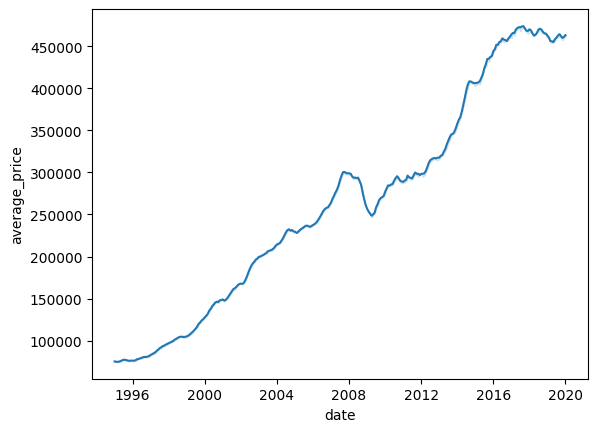

In [11]:
sns.lineplot(data=csv,x="date",y="average_price",ci=False)
plt.show()